#I, Import data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2APTuYCj85MTVxBbnTAg")

##*Cell phones*

In [ ]:
project = rf.workspace("ineuron-8bdse").project("mobile-phone-b83c7")
version = project.version(5)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mobile-Phone-5 in yolov9:: 100%|██████████| 3053/3053 [00:00<00:00, 3066.95it/s]


##*Horses*

In [ ]:
project = rf.workspace("jonathan-miller-shbdm").project("horse-bikoy")
version = project.version(1)
dataset = version.download("yolov9")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Horse-1 in yolov9:: 100%|██████████| 14236/14236 [00:02<00:00, 5568.35it/s]


#II, YOLOv10

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.3 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt



# New Section INTERFERENCE with PRE-TRAINED COCO MODEL

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=64 plots=True \
model='/content/weights/yolov10n.pt' \
data='/content/Horse-1/data.yaml'

/content
New https://pypi.org/project/ultralytics/8.2.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/Horse-1/data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

#**Display the confusion matrix and Results**

# **Testing the Trained Model**

In [ ]:
from IPython.display import Image
from ultralytics import YOLOv10

In [ ]:
model_path = '/content/best.pt'
model = YOLOv10(model_path)
results = model(source='/content/Horse-1/test/images/01865a44f4e5409d_jpg.rf.950decb91d891d38cf8c0729cf10deb3.jpg', conf=0.25,save=True)



image 1/1 /content/Horse-1/test/images/01865a44f4e5409d_jpg.rf.950decb91d891d38cf8c0729cf10deb3.jpg: 640x640 1 Horse, 12.7ms
Speed: 18.3ms preprocess, 12.7ms inference, 389.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


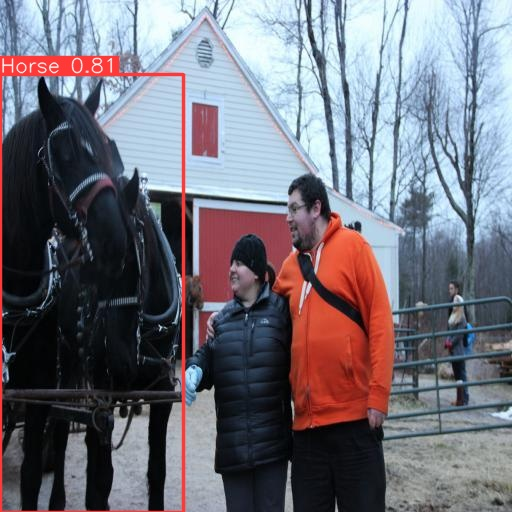

In [ ]:
import glob
images = glob.glob('/content/runs/detect/predict/01865a44f4e5409d_jpg.rf.950decb91d891d38cf8c0729cf10deb3.jpg')
for image in images:
  display(Image(filename = image,width=400))

In [ ]:
model_path = '/content/best.pt'
model = YOLOv10(model_path)
results = model(source='/content/Horse_flip.mp4', conf=0.25,save=True)





WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/194) /content/Horse_flip.mp4: 384x640 1 Horse, 17.4ms
video 1/1 (frame 2/194) /content/Horse_flip.mp4: 384x640 1 Horse, 20.0ms
video 1/1 (frame 3/194) /content/Horse_flip.mp4: 384x640 1 Horse, 14.2ms
video 1/1 (frame 4/194) /content/Horse_flip.mp4: 384x640 1 Horse, 9.6ms
video 1/1 (frame 5/194) /content/Horse_flip.mp4: 384x640 2 Horses, 11.0ms
video 1/1 (frame 6/194) /content/Horse_flip.mp4: 384x640 1 Horse, 9.7ms
video 1/1 (frame 7/